In [1]:
import numpy as np
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"
from matplotlib.dates import DateFormatter
from datetime import datetime as dt
import statsmodels.api as sm
from scipy import stats

In [14]:
root = './'
auxdata = root+"auxdata/"

In [3]:
strin = pd.read_csv(auxdata+"stringency_fourstates_monthly.csv")
strin['month'] = pd.to_datetime(strin['month'])

# Fig 4A

In [4]:
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

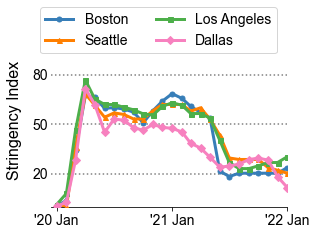

In [5]:
fig,ax = plt.subplots(figsize=(4.5,2.5))
hlab = "2019 trend"

for i,(city_name,lab,col,mark) in enumerate(zip(['Massachusetts','Washington','California','Texas'], ["Boston","Seattle",'Los Angeles','Dallas'],
                                      [CB_color_cycle[0],CB_color_cycle[1],CB_color_cycle[2],CB_color_cycle[3]],
                                      ["o","^",'s',"D"])):
    this = strin[strin["RegionName"]==city_name]
    ax.plot(this['month'], this['StringencyIndex'], label=lab, color=col, linestyle='-', linewidth=3, marker=mark, markersize=5, zorder=5)

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_major_formatter(DateFormatter('%Y/%m'))
ax.set_ylabel('Stringency Index', fontsize=16, rotation=90, labelpad=10, y=.65)
ax.set_xticks(["2020-01-01","2021-01-01","2022-01-01"])
ax.set_xticklabels(["'20 Jan","'21 Jan","'22 Jan"], fontsize=14, family='Arial')
ax.set_yticks([20,50,80])
ax.set_yticklabels(['20','50','80'], fontsize=14, family='Arial')
for y,sty in zip([20,50,80],[":",":",":"]):
    ax.axhline(y, linestyle=sty, color='gray', zorder=1)
ax.set_xlim(dt.strptime("2019-12-15","%Y-%m-%d"), dt.strptime("2022-01-01","%Y-%m-%d"))
ax.set_ylim(0)
ax.tick_params(axis=u'y', which=u'both',length=0)
fig.legend(ncol=2, loc="lower center", bbox_to_anchor=(.5,.99), fontsize=14)
plt.tight_layout()
plt.show()    

# Fig 4B

In [6]:
def getcovidcasedata_USA():
    covidcases = pd.read_csv(auxdata+"allUS_covidcases_deaths.csv")
    covidcases["Date"] = pd.to_datetime(covidcases["month"], format="%Y%m")
    covidcases = covidcases[covidcases["Date"]<=dt.strptime("2022-01-01", "%Y-%m-%d")]
    covidcases = covidcases.rename(columns={'cases_diff':'Positives', 'deaths_diff':'Deaths'})
    covidcases["yyyymm"] = covidcases["Date"].apply(lambda x: dt.strftime(x, "%Y%m"))
    covidcases_monthly = covidcases.groupby(["yyyymm"]).agg({"Positives":"sum","Deaths":"sum"}).reset_index()
    covidcases_monthly["yyyymm_d"] = pd.to_datetime(covidcases_monthly["yyyymm"], format="%Y%m")
    return covidcases_monthly

In [7]:
def getcovidcasedata_wholearea(city_name):
    covidcases = pd.read_csv(auxdata+city_name+"_covidcases_deaths-bycounty.csv")
    covidcases["Date"] = pd.to_datetime(covidcases["month"], format="%Y%m")
    covidcases = covidcases[covidcases["Date"]<=dt.strptime("2022-01-01", "%Y-%m-%d")]
    covidcases = covidcases.rename(columns={'cases_diff':'Positives', 'deaths_diff':'Deaths'})
    covidcases["yyyymm"] = covidcases["Date"].apply(lambda x: dt.strftime(x, "%Y%m"))
    covidcases_monthly = covidcases.groupby(["yyyymm"]).agg({"Positives":"sum","Deaths":"sum"}).reset_index()
    covidcases_monthly["yyyymm_d"] = pd.to_datetime(covidcases_monthly["yyyymm"], format="%Y%m")
    return covidcases_monthly

C:\Users\yabec\anaconda3\envs\py38\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\yabec\anaconda3\envs\py38\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\yabec\anaconda3\envs\py38\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


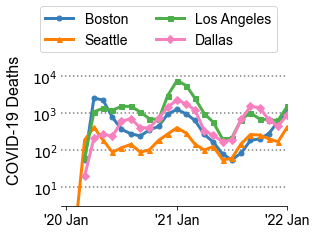

In [8]:
fig,ax = plt.subplots(figsize=(4.5,2.5))
hlab = "2019 trend"

for i,(city_name,lab,col,mark) in enumerate(zip(['boston','seattle','la','dallas'], ["Boston","Seattle",'Los Angeles','Dallas'],
                                      [CB_color_cycle[0],CB_color_cycle[1],CB_color_cycle[2],CB_color_cycle[3]],
                                      ["o","^",'s',"D"])):
    covidcases_monthly = getcovidcasedata_wholearea(city_name)
    ax.plot(covidcases_monthly['yyyymm_d'], np.log10(covidcases_monthly['Deaths']), 
            label=lab, color=col, linestyle='-', linewidth=3, marker=mark, markersize=5, zorder=5)

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_major_formatter(DateFormatter('%Y/%m'))
ax.set_ylabel('COVID-19 Deaths', fontsize=16, rotation=90, labelpad=10, y=.65)
ax.set_xticks(["2020-01-01","2021-01-01","2022-01-01"])
ax.set_xticklabels(["'20 Jan","'21 Jan","'22 Jan"], fontsize=14, family='Arial')
ax.set_yticks([1,2,3,4])
ax.set_yticklabels(['$10^1$','$10^2$','$10^3$','$10^4$'], fontsize=14, family='Arial')
for y,sty in zip([1,2,3,4],[":",":",":",":"]):
    ax.axhline(y, linestyle=sty, color='gray', zorder=1)
ax.set_xlim(dt.strptime("2019-12-15","%Y-%m-%d"), dt.strptime("2022-01-01","%Y-%m-%d"))
ax.set_ylim(.5)
ax.tick_params(axis=u'y', which=u'both',length=0)
fig.legend(ncol=2, loc="lower center", bbox_to_anchor=(.5,.99), fontsize=14)
plt.tight_layout()
plt.show()    

# Fig 4C

In [9]:
df = pd.read_csv(root+"fig1/"+"fig1C.csv")    

In [10]:
def getdatforplot_trends(df, city_name, diff):
    this = df[(df['city']==city_name)&(df['variable']=="uid_indivseg")]
    useg_both = pd.DataFrame({'date':this['date'], 'excessseg':this['value']})
    useg_both['yyyymm_d'] = pd.to_datetime(useg_both['date'])
    useg_both = useg_both[useg_both["yyyymm_d"]>dt.strptime("2020-03-01","%Y-%m-%d")]
    covidcases_monthly = getcovidcasedata_wholearea(city_name)
    covidcases_monthly_usa = getcovidcasedata_USA()
    useg_both_cases = (useg_both.merge(covidcases_monthly[['yyyymm_d','Positives','Deaths']], on='yyyymm_d', how='left').fillna(0)
                       .rename(columns={"Positives":'Positives_local', "Deaths":"Deaths_local"}))
    useg_both_cases = (useg_both_cases.merge(covidcases_monthly_usa[['yyyymm_d','Positives','Deaths']], on='yyyymm_d', how='left').fillna(0)
                       .rename(columns={"Positives":'Positives_us', "Deaths":"Deaths_us"}))
    return useg_both_cases

In [11]:
def get_datatable(df,city,state):
    this = getdatforplot_trends(df, city, '2019')
    this_strin = strin[strin['RegionName']==state][['month','StringencyIndex']]
    this_strin['yyyymm_d'] = pd.to_datetime(this_strin['month'])
    this = this[['yyyymm_d','excessseg',
                 'Positives_local','Deaths_local','Positives_us','Deaths_us']].merge(this_strin, on='yyyymm_d', how='left')
    return this

In [12]:
def run_regression(this):
    YX = this[['excessseg','Deaths_local','StringencyIndex']].dropna()
    Y = YX[['excessseg']]
    X = YX.drop(columns='excessseg')
    X = sm.add_constant(X)
    results = sm.OLS(Y,X).fit()
    return results, Y, X

C:\Users\yabec\anaconda3\envs\py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


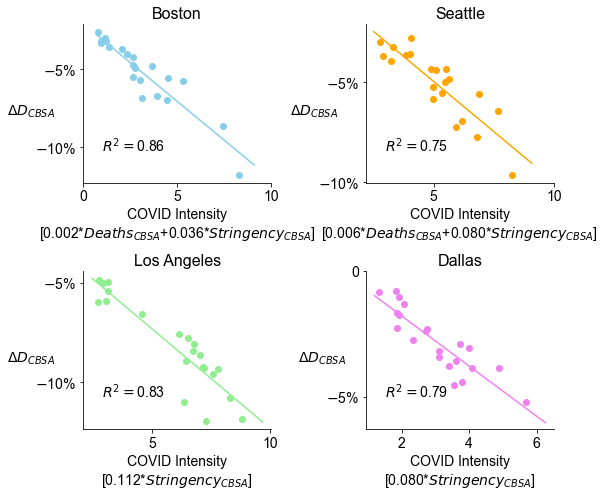

In [13]:
fig,ax = plt.subplots(2,2,figsize=(8,7))
fig.patch.set_facecolor('white')
for i,(city,nam,col,state,xticks,yticks) in enumerate(zip(['boston','seattle','la','dallas'],
                                                          ['Boston','Seattle','Los Angeles','Dallas'],
                                                          ['skyblue','orange','lightgreen','violet'],
                                                          ['Massachusetts','Washington','California','Texas'],
                                                          [[0,5,10],[5,10],[5,10],[2,4,6]],
                                                          [[-10,-5],[-10,-5],[-10,-5],[-5,0]])):
    x = i%2
    y = i//2
    axthis = ax[y,x]
    this = get_datatable(df,city,state)
    res,y,x = run_regression(this)
    const = res.params["const"]
    this["x"] = -(x["Deaths_local"]*res.params["Deaths_local"]+x["StringencyIndex"]*res.params["StringencyIndex"])
    axthis.scatter(this["x"], y, color=col)
    slope, intercept, r_value, p_value, std_err = stats.linregress(this["x"].values.flatten(),y.values.flatten())
    axthis.annotate(r"$R^2=$"+str(round(r_value**2,2)), xy=(.1,.2), xycoords='axes fraction', fontsize=14)
      
    axthis.plot([min(this["x"])*0.9,max(this["x"])*1.1], [intercept+min(this["x"])*0.9*slope, intercept+max(this["x"])*1.1*slope], color=col)
    axthis.set_xticks(xticks)
    axthis.set_yticks(yticks)
    newxticks = []
    for x in yticks:
        if x<0:
            newxticks.append(r"$\minus$"+str(x).replace("-","")+"%")
        else:
            newxticks.append(str(x))

    axthis.set_xticklabels(xticks, fontsize=14)
    axthis.set_yticklabels(newxticks, fontsize=14)
    axthis.spines['top'].set_visible(False)
    axthis.spines['right'].set_visible(False)
    axthis.set_ylabel(r"$\Delta D_{CBSA}$", fontsize=14, rotation=0, y=.4)
    if (city=='la') | (city=='dallas'):
        axthis.set_xlabel("COVID Intensity\n["+str(-res.params["StringencyIndex"])[:5]+"*$Stringency_{CBSA}$"+"]", fontsize=14)
    else:
        axthis.set_xlabel("COVID Intensity\n["+str(-res.params["Deaths_local"])[:5]+
                          "*$Deaths_{CBSA}$+"+str(-res.params["StringencyIndex"])[:5]+"*$Stringency_{CBSA}$"+"]", fontsize=14)
    axthis.set_title(nam, fontsize=16)

plt.tight_layout()
plt.show()    